In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

In [2]:
def plot_outliers(data,outlier,outlier_model):
    subfig1 = plt.subplot(1, 1, 1)
    subfig1.scatter(data[:,0][outlier==1],
                data[:,1][outlier==1],
                c="orange",label="Normal")
    subfig1.scatter(data[:,0][outlier==-1],
                data[:,1][outlier==-1],
                c="green",label="Anomaly")
    # Show contours of the distance functions
    xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                         np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
    zz = np.c_[xx.ravel(), yy.ravel()]

    mahal_emp_cov = outlier_model.mahalanobis(zz)
    mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
    emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                      cmap=plt.cm.PuBu_r,
                                      linestyles='dashed')
    plt.legend()

In [3]:
df = pd.read_csv("uncleaned_data.csv")

In [4]:
adult_indigenous =  df['Adults_Questioanire_AboriginalTorresStraitIslander'].fillna(0)
child_indigenous =  df['SchooAge_Questioanire_AboriginalTorresStraitIslander'].fillna(0)

In [5]:
is_indigenous = adult_indigenous + child_indigenous

In [6]:
df = df.drop('Adults_Questioanire_AboriginalTorresStraitIslander',axis=1)
df = df.drop('SchooAge_Questioanire_AboriginalTorresStraitIslander',axis=1)

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df['Is_Indigenous'] = is_indigenous == 2

In [9]:
columns = df.columns

I'm going to be looking at the PTA results because they seem to be the most complete (around 100 rows have NaN values)

In [10]:
# we look at the PTA tests
pta_columns_left = [c for c in columns if "PTA_Left" in c ]
pta_columns_right = [c for c in columns if "PTA_Right" in c ]

We are going to do anomaly detection for the left ear and right ear separately

the number of outliers 70 out of 1394 participants


Text(0.5,1,'PTA dignostic Left')

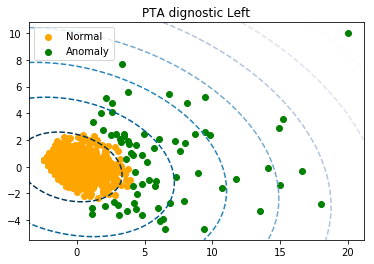

In [129]:
no_nan_left = df[pta_columns_left].dropna(axis=0)
scaler = StandardScaler()
scaled = scaler.fit_transform(no_nan_left)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

envel = EllipticEnvelope(contamination=0.05)
envel.fit(X_trans)
pta_left_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_left_outliers==-1),
                                                                 len(pta_left_outliers)))
df.loc[no_nan_left.index,'PTA_outlier_left'] = pta_left_outliers
plot_outliers(X_trans,pta_left_outliers,envel)
plt.title("PTA dignostic Left")
#plt.savefig("figures/PTA_diagnostic_left_w_anomaly.png")

Text(0.5,1,'PTA dignostic Left')

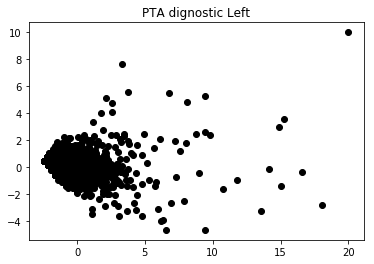

In [104]:
plt.scatter(X_trans[:,0],X_trans[:,1],c='black')
plt.title("PTA dignostic Left")
#lt.savefig("figures/PTA_diagnostic_left.png")

the number of outliers 70 out of 1394 participants


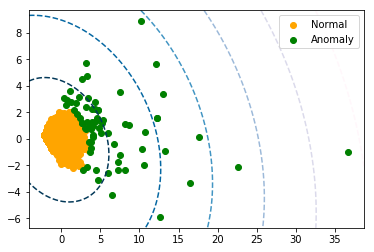

In [124]:
no_nan_left = df[pta_columns_right].dropna(axis=0)
scaler = StandardScaler()
scaled = scaler.fit_transform(no_nan_left)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

envel = EllipticEnvelope(contamination=0.05)
envel.fit(X_trans)
pta_left_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_left_outliers==-1),
                                                                 len(pta_left_outliers)))
df.loc[no_nan_left.index,'PTA_outlier_right'] = pta_left_outliers
plot_outliers(X_trans,pta_left_outliers,envel)

In [117]:
avg_left_pta = df.groupby('PTA_outlier_left')[pta_columns_left].median().mean(axis=1)
avg_right_pta = df.groupby('PTA_outlier_right')[pta_columns_right].median().mean(axis=1)

In [118]:
avg_left_pta

PTA_outlier_left
-1.0    22.142857
 1.0     5.000000
dtype: float64

In [116]:
avg_right_pta

PTA_outlier_right
-1.0    21.428571
 1.0     5.000000
dtype: float64

In [83]:
avg_left_pta = df.groupby('PTA_outlier_left')[pta_columns_left].mean().mean(axis=1)
avg_right_pta = df.groupby('PTA_outlier_right')[pta_columns_right].mean().mean(axis=1)
print(avg_left_pta)
print(avg_right_pta)

PTA_outlier_left
-1.0    25.673469
 1.0     5.952741
dtype: float64
PTA_outlier_right
-1.0    27.367347
 1.0     5.954899
dtype: float64


### do both ears together

In [154]:
pta_columns = [c for c in columns if "PTA" in c ]
no_nan_both = df[pta_columns].dropna(axis=0)
#scaler = StandardScaler()
#scaled = scaler.fit_transform(no_nan_both)
pca = PCA(n_components=2,whiten=True)
X_trans = pca.fit_transform(no_nan_both)

envel = EllipticEnvelope(contamination=0.1)
envel.fit(X_trans)
pta_both_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_both_outliers==-1),
                                                                 len(pta_both_outliers)))
#df.loc[no_nan_left.index,'PTA_outlier_right'] = pta_left_outliers
#plot_outliers(X_trans,pta_left_outliers,envel)

the number of outliers 137 out of 1369 participants


## Get the otoscopy results and see if they correspond to the pta outliers

In [155]:
otoscopy_columns = [c for c in columns if "Otoscopy" in c ]

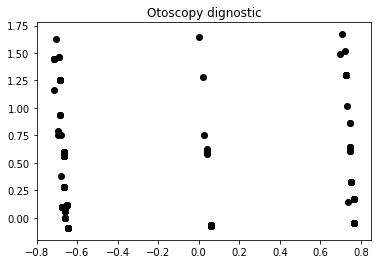

In [168]:
no_nan_oto = df.iloc[no_nan_both.index][otoscopy_columns].dropna(axis=0)
#scaler = StandardScaler()
#scaled = scaler.fit_transform(no_nan_oto)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(no_nan_oto)
plt.scatter(X_trans[:,0],X_trans[:,1],c='black')
plt.title("Otoscopy dignostic")
plt.savefig("otoscopy.png")

Text(0.5,1,'Otoscopy dignostic')

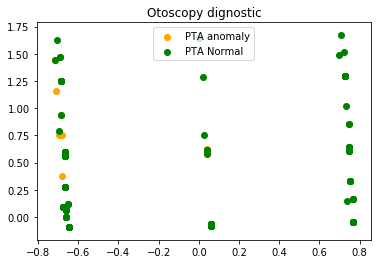

In [157]:
plt.scatter(X_trans[:,0][pta_both_outliers==-1],
            X_trans[:,1][pta_both_outliers==-1],
            label="PTA anomaly",c='orange')
plt.scatter(X_trans[:,0][pta_both_outliers==1],
            X_trans[:,1][pta_both_outliers==1],
            label="PTA Normal",c='Green')
plt.legend()
plt.title("Otoscopy dignostic")


## look at OAE

In [98]:
oae_columns_left = [c for c in columns if "OAE_P1_SNR_Left" in c ]
oae_columns_right = [c for c in columns if "OAE_P1_SNR_Right" in c ]

the number of outliers 67 out of 1332 participants


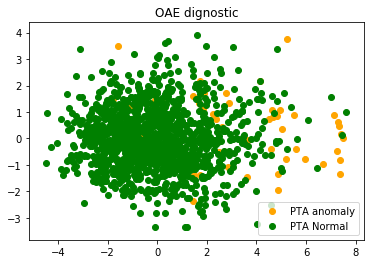

In [136]:
no_nan_oae_left = df.iloc[no_nan_left.index][oae_columns_left].dropna(axis=0)
scaler = StandardScaler()
scaled = scaler.fit_transform(no_nan_oae_left)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

envel = EllipticEnvelope(contamination=0.05)
envel.fit(X_trans)
oae_left_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(oae_left_outliers==-1),
                                                                 len(oae_left_outliers)))

oae_pta_outliers = df.iloc[no_nan_oae_left.index]['PTA_outlier_left']
#df.loc[no_nan_oae_left.index,'OAE_outlier_left'] = pta_left_outliers
#plot_outliers(X_trans,oae_pta_outliers,envel)
plt.scatter(X_trans[:,0][oae_pta_outliers==-1],
            X_trans[:,1][oae_pta_outliers==-1],
            label="PTA anomaly",c='orange')
plt.scatter(X_trans[:,0][oae_pta_outliers==1],
            X_trans[:,1][oae_pta_outliers==1],
            label="PTA Normal",c='Green')
plt.legend()
plt.title("OAE dignostic")
plt.savefig("figures/OAE_diagnostic_w_PTA_anomaly.png")

In [132]:
len(oae_pta_outliers)

1332

the number of outliers 67 out of 1340 participants


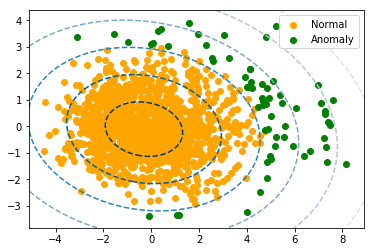

In [101]:
no_nan_left = df[oae_columns_left].dropna(axis=0)
scaler = StandardScaler()
scaled = scaler.fit_transform(no_nan_left)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

envel = EllipticEnvelope(contamination=0.05)
envel.fit(X_trans)
pta_left_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_left_outliers==-1),
                                                                 len(pta_left_outliers)))
df.loc[no_nan_left.index,'OAE_outlier_left'] = pta_left_outliers
plot_outliers(X_trans,pta_left_outliers,envel)
#plt.savefig("OAE_diagnostic_left_w_anomaly.png")

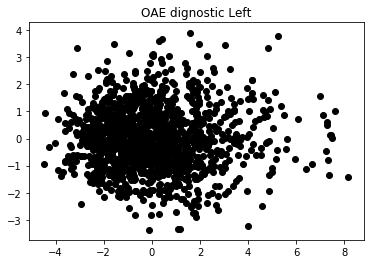

In [102]:
plt.scatter(X_trans[:,0],X_trans[:,1],c='black')
plt.title("OAE dignostic Left")
plt.savefig("OAE_diagnostic_left.png")

the number of outliers 64 out of 1269 participants


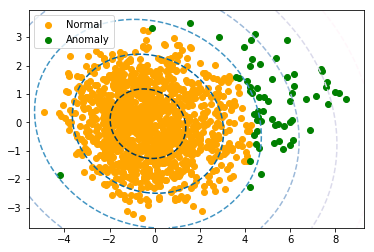

In [88]:
no_nan_left = df[oae_columns_right].dropna(axis=0)
scaler = StandardScaler()
scaled = scaler.fit_transform(no_nan_left)
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

envel = EllipticEnvelope(contamination=0.05)
envel.fit(X_trans)
pta_left_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_left_outliers==-1),
                                                                 len(pta_left_outliers)))
df.loc[no_nan_left.index,'OAE_outlier_right'] = pta_left_outliers
plot_outliers(X_trans,pta_left_outliers,envel)

In [96]:
avg_left_pta = df.groupby('OAE_outlier_left')[pta_columns_left].mean().mean(axis=1)
avg_right_pta = df.groupby('OAE_outlier_right')[pta_columns_right].mean().mean(axis=1)
print("mean")
print(avg_left_pta)
print(avg_right_pta)

mean
OAE_outlier_left
-1.0    16.527105
 1.0     6.305010
dtype: float64
OAE_outlier_right
-1.0    20.373441
 1.0     6.138010
dtype: float64


In [97]:
avg_left_pta = df.groupby('OAE_outlier_left')[pta_columns_left].median().mean(axis=1)
avg_right_pta = df.groupby('OAE_outlier_right')[pta_columns_right].median().mean(axis=1)
print("median")
print(avg_left_pta)
print(avg_right_pta)

median
OAE_outlier_left
-1.0    10.0
 1.0     5.0
dtype: float64
OAE_outlier_right
-1.0    13.928571
 1.0     5.000000
dtype: float64


In [ ]:
subfig1 = plt.subplot(1, 1, 1)
subfig1.scatter(X_trans[:,0][gender==0],
            X_trans[:,1][gender==0],
            c="orange",label="Female")
subfig1.scatter(X_trans[:,0][gender==1],
            X_trans[:,1][gender==1],
            c="green",label="Male")
# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = envel.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')
plt.legend()

In [ ]:
pta_outliers = envel.predict(X_trans)
print("the number of outliers {0} out of {1} participants".format(sum(pta_outliers==-1),
                                                                 len(pta_outliers)))
df['PTA outlier'] = np.NaN
df.loc[no_nan.index,'PTA_outlier'] = pta_outliers

Looking at the plot above, you can see that there's a region of "normal" hearing ability (where the points are most dense on the left hand side) and then it spreads towards the right hand side. 

So perhaps we have a measure of what is considered as "abnormal" hearing: data points that land outside the innermost ellipse are those

## looking at otoscopy data

In [158]:
# we look at the PTA tests
otoscopy_columns = [c for c in columns if "Otoscopy" in c ]

In [162]:
no_nan_oto = df.iloc[no_nan_both.index][otoscopy_columns].dropna(axis=0)
print(no_nan_oto.shape)

(1369, 16)


In [163]:
X_trans_oto = pca.fit_transform(no_nan_oto)

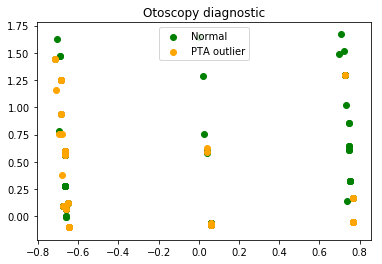

In [169]:
plt.scatter(X_trans_oto[:,0][pta_both_outliers==1],
            X_trans_oto[:,1][pta_both_outliers==1],
            label="Normal",c="green")
plt.scatter(X_trans_oto[:,0][pta_both_outliers==-1],
            X_trans_oto[:,1][pta_both_outliers==-1],
            c="Orange",label="PTA outlier")
plt.legend()
plt.title("Otoscopy diagnostic")
plt.savefig("otopscopy_w_pta_anomaly.png")

We've reduced the dimenionality of the 16 otoscopy tests. We can see that there are three clusters of data. The colours represent the outliers determined from the earlier experiments. You can see that the group on the HS has most of the outliers of the PTA test

## OAE tests

In [ ]:
oae_columns = [c for c in columns if "OAE" in c ]
oae_columns = [c for c in oae_columns if "SNR" in c ]

In [ ]:
oae = df.iloc[no_nan.index][oae_columns].dropna(axis=0)

In [ ]:
oae_scaled = scaler.fit_transform(oae)
pca = PCA(n_components=2,whiten=True)

oae_trans = pca.fit_transform(oae)
envel = EllipticEnvelope()
envel.fit(oae_trans)
oae_outliers = envel.predict(oae_trans)
print("the number of outliers {0} out of {1} participants".format(sum(oae_outliers==-1),
                                                                 len(oae_outliers)))
df['OAE_outlier'] = np.NaN
df.loc[oae.index,'OAE_outlier'] = oae_outliers

In [ ]:
plot_outliers(oae_trans,oae_outliers,envel)

In [ ]:
df[df['OAE_outlier'] == -1][df['PTA_outlier'] == -1].shape

## TEOAE test

In [ ]:
tel_columns = [c for c in columns if "SNR" in c ]
tel_columns = [c for c in tel_columns if "OAE" not in c ]

In [ ]:
tel = df[tel_columns].dropna(axis=0)

In [ ]:
tel_scaled = scaler.fit_transform(tel)
pca = PCA(n_components=2,whiten=True)

tel_trans = pca.fit_transform(tel)
envel = EllipticEnvelope(contamination=0.01)
envel.fit(tel_trans)
tel_outliers = envel.predict(tel_trans)
print("the number of outliers {0} out of {1} participants".format(sum(oae_outliers==-1),
                                                                 len(oae_outliers)))
df['TEL_outlier'] = np.NaN
df.loc[tel.index,'TEL_outlier'] = tel_outliers

In [ ]:
plot_outliers(tel_trans,tel_outliers,envel)

## combine oae and PTA test

In [ ]:
combine = pta_columns + oae_columns

In [ ]:
pta_oae_comb = df[combine].dropna(axis=0)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(pta_oae_comb)

In [ ]:
pca = PCA(n_components=2)
X_trans = pca.fit_transform(scaled)

In [ ]:
from sklearn.covariance import EllipticEnvelope
envel = EllipticEnvelope(contamination=0.03)
envel.fit(X_trans)
predict_outliers = envel.predict(X_trans)

In [ ]:
df.loc[pta_oae_comb.index,'outlier'] = predict_outliers

In [ ]:
plot_outliers(X_trans,predict_outliers,envel)

In [ ]:

avg_left_pta = df.groupby('outlier')[[col for col in pta_columns if 'Left' in col]].mean().mean(axis=1)
avg_right_pta = df.groupby('outlier')[[col for col in pta_columns if 'Right' in col]].mean().mean(axis=1)

In [ ]:
print(avg_left_pta)
print(avg_right_pta)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
scaled =  scaler.fit_transform(pta_oae_comb[oae_columns])
pca = PCA(n_components=5)

X = scaled
#X = pca.fit_transform(scaled)
y = predict_outliers
n_anomalies = sum(predict_outliers==-1)
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

#clf = svm.SVC(kernel='linear', C=0.1)
clf = LogisticRegression(C=0.1,class_weight="balanced")
scores = []
for train_index, test_index in skf.split(X, y):
    ind = np.random.choice(train_index,size=n_anomalies)
    final = np.concatenate((np.where(y[train_index]==-1,)[0],ind))
    
    clf.fit(X[final],y[final])
    scores.append(clf.score(X[test_index],y[test_index]))
    y_pred = clf.predict(X[test_index])
    print(confusion_matrix(y[test_index], y_pred,labels=(-1,1)))

In [ ]:
age = df.iloc[pta_oae_comb.index][['General_Age','outlier']]

In [ ]:
plt.hist(age[age['outlier']==-1]['General_Age'],normed=True)
plt.hist(age[age['outlier']==1]['General_Age'],normed=True,alpha=0.3)

In [ ]:
questionaire_cols = []
for col in df.columns:
    if "SchooAge_Questioanire" in col:
        questionaire_cols.append(col)

In [ ]:
questionaire_cols + ['General_Age','General_Gender','Is_Indigenous']